# Housing Price Machine Learning Model

## Background:

Using a housing prices datasets from Kaggle I have created a linear regression machine learning model. The goal of the machine learning model is to predict the house price based on 12 factors: area, bedrooms, bathrooms,	stories, mainroad, guestroom, basement, hot water heating, air conditioning, parking, preferred area and furnishing status.
### Objectives

* Practice the machine learning process
* Work with a linear regression machine learning model
* Practice a cleaning and exploring datasets

## 1. Collect the Data

Imported dataset using pandas. The dataset is sourced from Kaggle

In [315]:
import pandas as pd
housing = pd.read_csv("housing.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## 2. Explore the Data

Checking to see if there is any null values present in the dataset.

In [316]:
housing.isnull().sum().sort_values(ascending=False)/housing.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [317]:
housing.info

<bound method DataFrame.info of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no

In [318]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


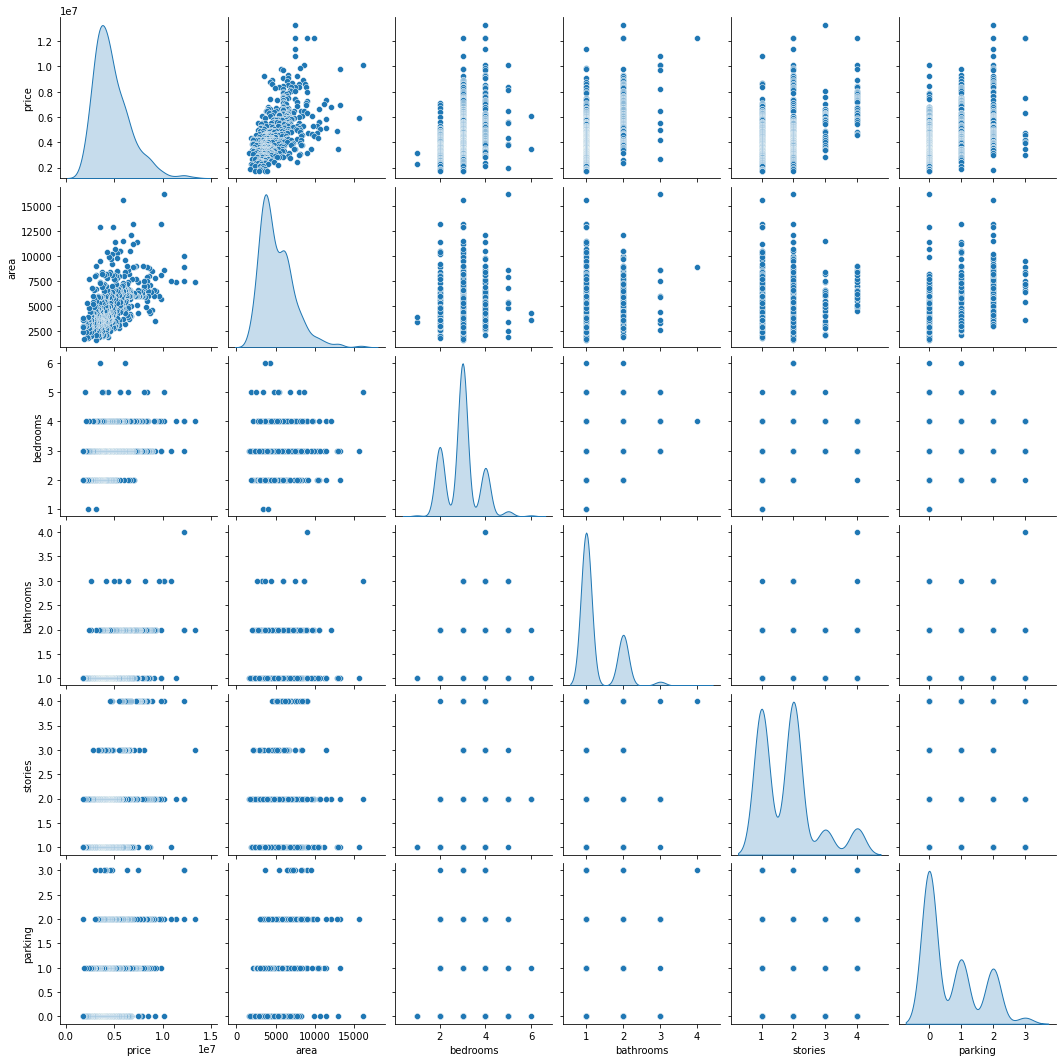

In [319]:
import seaborn as sns
sns.pairplot(data=housing, diag_kind='kde')

<AxesSubplot:xlabel='area', ylabel='price'>

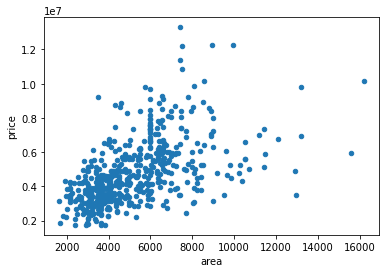

In [320]:
%matplotlib inline
housing.plot(kind = 'scatter', x = 'area', y = 'price')

A moderate positive correlation can be seen between the area of the house and the price of the house.

<AxesSubplot:xlabel='guestroom', ylabel='price'>

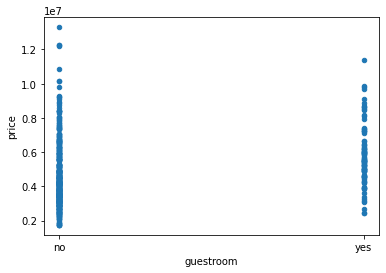

In [321]:
housing.plot(kind = 'scatter', x = 'guestroom', y = 'price')

 I thought that this graph showed that wether the house has a guest room or not does not play an influential role on the prices of the houses.

## 3. Cleaning the Data

In the code block below I am changing the categorical variables into numerical values. Since the guest room feature does not play a big part in determining the house price I am dropping it from the dataset.

In [322]:
housing['mainroad']  = housing['mainroad'] = housing['mainroad'].map({'yes': 1, 'no': 0})
housing['basement']  = housing['basement'] = housing['basement'].map({'yes': 1, 'no': 0})
housing['hotwaterheating']  = housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes': 1, 'no': 0})
housing['airconditioning']  = housing['airconditioning'] = housing['airconditioning'].map({'yes': 1, 'no': 0})
housing['prefarea']  = housing['prefarea'] = housing['prefarea'].map({'yes': 1, 'no': 0})
housing = housing.drop('guestroom', axis=1)
housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,0,1,2,0,furnished


In the next code blocks below I am changing the feature furnishing status to numerical values by first determine the number of unique values that column contains.

In [323]:
housing.furnishingstatus.unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [324]:
housing['furnishingstatus']  = housing['furnishingstatus'] = housing['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished':0})
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,0,1,2,0,2


## 4. Training the Model

In [325]:
response = 'price'
y = housing['price']
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [326]:
predictors = list(housing.columns)
predictors.remove(response)
x = housing[predictors]
x

,area,bedrooms,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,1,2,1,2
1,8960,4,4,4,1,0,0,1,3,0,2
2,9960,3,2,2,1,1,0,0,2,1,1
3,7500,4,2,2,1,1,0,1,3,1,2
4,7420,4,1,2,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,1,0,0,2,0,0
541,2400,3,1,1,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0
543,2910,3,1,1,0,0,0,0,0,0,2


In [327]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1234) 



In [328]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)



## 5.  Evaluating the Model

In [330]:
model.intercept_

-339769.81763675716

In [331]:
model.coef_

array([2.40022620e+02, 1.11579023e+05, 9.39878353e+05, 5.20150855e+05,
       3.70939050e+05, 4.08519371e+05, 8.12099309e+05, 9.22808891e+05,
       2.71935677e+05, 7.44671860e+05, 2.60277472e+05])

In [332]:
training_accuracy = model.score(x_train,y_train)
training_accuracy

0.6711445853879281

In [333]:
model.score(x_test, y_test)

0.6881355080023343

In [334]:
from sklearn.metrics import r2_score,mean_squared_error

In [335]:
ypred = model.predict(x_test)

In [336]:
mean_squared_error(y_pred,y_test)


940702996345.912

In [337]:
k=r2_score(y_pred,y_test)
k

0.6141920287809386